___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [3]:
# set start and end datetime objects
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2017,1,1)

In [4]:
start.date()

datetime.date(2013, 1, 1)

In [24]:
# Thicker symbols for banks as they appear above: BAC, C, GS, JPM, MS, WFC 

In [8]:
# Bank of America
BAC = data.DataReader("BAC", 'iex', start, end)

# CitiGroup
C = data.DataReader("C", 'iex', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'iex', start, end)

# JP Morgan
JPM = data.DataReader("JPM", 'iex', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'iex', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'iex', start, end)

In [36]:
WFC.head()

open     high      low    close    volume
date                                                    
2013-09-23  36.8224  36.9092  36.5099  36.7269  16474582
2013-09-24  36.5186  36.7182  36.1974  36.2234  22122725
2013-09-25  36.3102  36.4231  35.8415  36.2929  19187145
2013-09-26  36.3884  36.6314  35.9456  36.1193  20494186
2013-09-27  36.0845  36.2581  36.0325  36.1019  20017656

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [9]:
tickers = ["BAC ", "C ", "GS ", "JPM ", "MS ", "WFC "]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [10]:
# using pd.concat method
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [62]:
bank_stocks.head()

BAC                                              C            \
               open     high      low    close     volume     open     high   
date                                                                          
2013-09-23  13.4241  13.4381  13.2177  13.2646  127074957  47.8652  48.0761   
2013-09-24  13.3021  13.3678  13.1426  13.2177   96122141  47.3670  47.4149   
2013-09-25  13.2458  13.3584  13.1614  13.2646   86491478  46.9933  47.4724   
2013-09-26  13.3115  13.3396  13.1145  13.2083   89211460  47.2137  47.4245   
2013-09-27  13.1239  13.1614  13.0207  13.0395   78954848  46.7250  47.1466   

                                          ...         MS                     \
                low    close    volume    ...        open     high      low   
date                                      ...                                 
2013-09-23  47.2329  47.5012  34561992    ...     25.6581  25.7040  24.9612   
2013-09-24  46.8879  46.9166  26371407    ...     24.9794  25.4656  24.8512   
2013-09-25  46.6387  47.2041  26930854    ...     25.0529  25.1538  24.6311   
2013-09-26  46.4758  46.8879  23337352    ...     25.0070  25.2913  24.7778   
2013-09-27  46.6579  46.8496  20243114    ...     24.6678  24.8878  24.4843   

                                  WFC                                        
              close    volume     open     high      low    close    volume  
date                                                                         
2013-09-23  24.9612  23544535  36.8224  36.9092  36.5099  36.7269  16474582  
2013-09-24  25.0070  17116348  36.5186  36.7182  36.1974  36.2234  22122725  
2013-09-25  24.9612  16376615  36.3102  36.4231  35.8415  36.2929  19187145  
2013-09-26  24.8970  12894727  36.3884  36.6314  35.9456  36.1193  20494186  
2013-09-27  24.8328  12111939  36.0845  36.2581  36.0325  36.1019  20017656  

[5 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [11]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [12]:
bank_stocks.head()

Bank Ticker     BAC                                              C            \
Stock Info      open     high      low    close     volume     open     high   
date                                                                           
2013-09-23   13.4241  13.4381  13.2177  13.2646  127074957  47.8652  48.0761   
2013-09-24   13.3021  13.3678  13.1426  13.2177   96122141  47.3670  47.4149   
2013-09-25   13.2458  13.3584  13.1614  13.2646   86491478  46.9933  47.4724   
2013-09-26   13.3115  13.3396  13.1145  13.2083   89211460  47.2137  47.4245   
2013-09-27   13.1239  13.1614  13.0207  13.0395   78954848  46.7250  47.1466   

Bank Ticker                                ...         MS                     \
Stock Info       low    close    volume    ...        open     high      low   
date                                       ...                                 
2013-09-23   47.2329  47.5012  34561992    ...     25.6581  25.7040  24.9612   
2013-09-24   46.8879  46.9166  26371407    ...     24.9794  25.4656  24.8512   
2013-09-25   46.6387  47.2041  26930854    ...     25.0529  25.1538  24.6311   
2013-09-26   46.4758  46.8879  23337352    ...     25.0070  25.2913  24.7778   
2013-09-27   46.6579  46.8496  20243114    ...     24.6678  24.8878  24.4843   

Bank Ticker                        WFC                                        
Stock Info     close    volume     open     high      low    close    volume  
date                                                                          
2013-09-23   24.9612  23544535  36.8224  36.9092  36.5099  36.7269  16474582  
2013-09-24   25.0070  17116348  36.5186  36.7182  36.1974  36.2234  22122725  
2013-09-25   24.9612  16376615  36.3102  36.4231  35.8415  36.2929  19187145  
2013-09-26   24.8970  12894727  36.3884  36.6314  35.9456  36.1193  20494186  
2013-09-27   24.8328  12111939  36.0845  36.2581  36.0325  36.1019  20017656  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [13]:
# Note: my values will probably differ because my time period goes from 2013 to 2017 (iex source)
# pandas .xs Returns a cross-section (row(s) or column(s)) from the Series/DataFrame.
bank_stocks.xs(key='close', axis=1, level='Stock Info').max()
#df.xs('one', level=1)

Bank Ticker
BAC      22.5133
C        59.3148
GS      237.7628
JPM      83.8615
MS       42.2540
WFC      54.5668
dtype: float64

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [14]:
returns = pd.DataFrame()

In [15]:
bank_stocks.head()

Bank Ticker     BAC                                              C            \
Stock Info      open     high      low    close     volume     open     high   
date                                                                           
2013-09-23   13.4241  13.4381  13.2177  13.2646  127074957  47.8652  48.0761   
2013-09-24   13.3021  13.3678  13.1426  13.2177   96122141  47.3670  47.4149   
2013-09-25   13.2458  13.3584  13.1614  13.2646   86491478  46.9933  47.4724   
2013-09-26   13.3115  13.3396  13.1145  13.2083   89211460  47.2137  47.4245   
2013-09-27   13.1239  13.1614  13.0207  13.0395   78954848  46.7250  47.1466   

Bank Ticker                                ...         MS                     \
Stock Info       low    close    volume    ...        open     high      low   
date                                       ...                                 
2013-09-23   47.2329  47.5012  34561992    ...     25.6581  25.7040  24.9612   
2013-09-24   46.8879  46.9166  26371407    ...     24.9794  25.4656  24.8512   
2013-09-25   46.6387  47.2041  26930854    ...     25.0529  25.1538  24.6311   
2013-09-26   46.4758  46.8879  23337352    ...     25.0070  25.2913  24.7778   
2013-09-27   46.6579  46.8496  20243114    ...     24.6678  24.8878  24.4843   

Bank Ticker                        WFC                                        
Stock Info     close    volume     open     high      low    close    volume  
date                                                                          
2013-09-23   24.9612  23544535  36.8224  36.9092  36.5099  36.7269  16474582  
2013-09-24   25.0070  17116348  36.5186  36.7182  36.1974  36.2234  22122725  
2013-09-25   24.9612  16376615  36.3102  36.4231  35.8415  36.2929  19187145  
2013-09-26   24.8970  12894727  36.3884  36.6314  35.9456  36.1193  20494186  
2013-09-27   24.8328  12111939  36.0845  36.2581  36.0325  36.1019  20017656  

[5 rows x 30 columns]

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [16]:
tickers

['BAC ', 'C ', 'GS ', 'JPM ', 'MS ', 'WFC ']

In [17]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['close'].pct_change()

returns.head()

BAC  Return  C  Return  GS  Return  JPM  Return  MS  Return  \
date                                                                      
2013-09-23          NaN        NaN         NaN          NaN         NaN   
2013-09-24    -0.003536  -0.012307   -0.013797    -0.022155    0.001835   
2013-09-25     0.003548   0.006128   -0.004050     0.027425   -0.001831   
2013-09-26    -0.004244  -0.006699   -0.000123     0.003675   -0.002572   
2013-09-27    -0.012780  -0.000817   -0.015035     0.006746   -0.002579   

            WFC  Return  
date                     
2013-09-23          NaN  
2013-09-24    -0.013709  
2013-09-25     0.001919  
2013-09-26    -0.004783  
2013-09-27    -0.000482

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

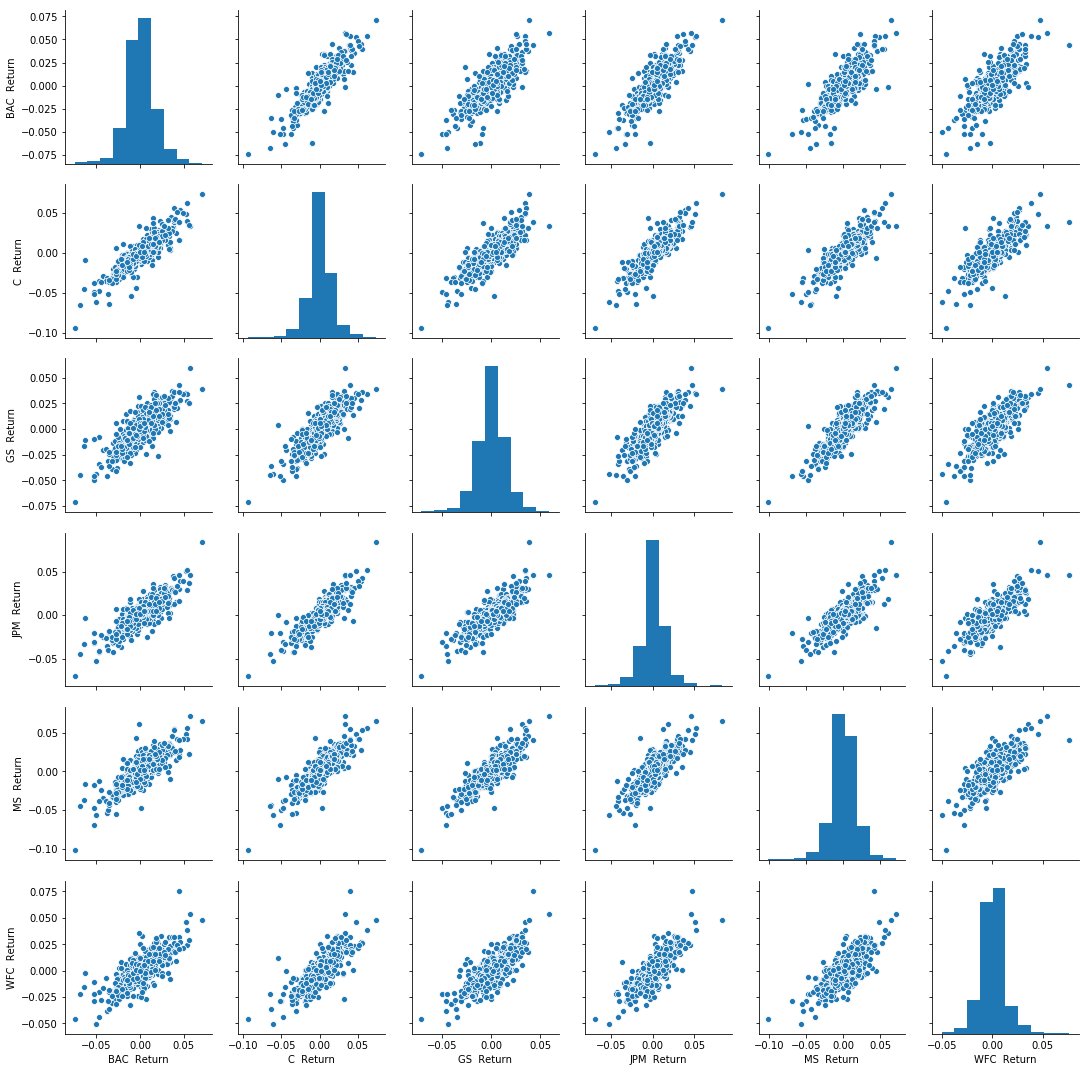

In [71]:
import seaborn as sns
sns.pairplot(data=returns[1:]) # first row are NaN elements 

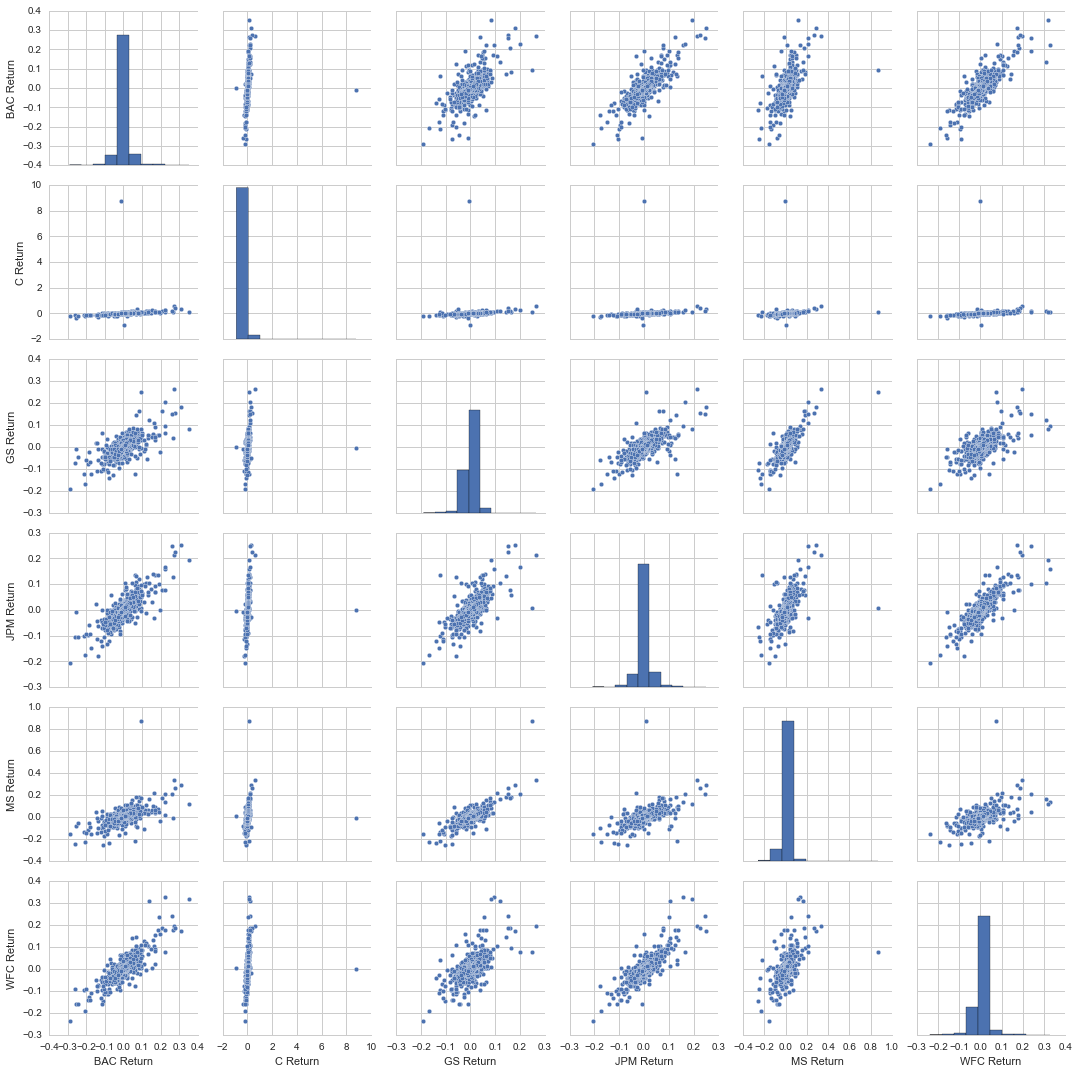

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [72]:
returns.idxmin()

BAC  Return    2016-06-24
C  Return      2016-06-24
GS  Return     2016-06-24
JPM  Return    2016-06-24
MS  Return     2016-06-24
WFC  Return    2015-08-24
dtype: object

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [73]:
returns.idxmax()

BAC  Return    2016-02-12
C  Return      2016-02-12
GS  Return     2016-11-09
JPM  Return    2016-02-12
MS  Return     2016-11-09
WFC  Return    2016-11-10
dtype: object

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [74]:
# std over the entire time period
returns.std() # Higher std translates to riskier (for this time span, they are all about the same)

BAC  Return    0.016524
C  Return      0.015961
GS  Return     0.013953
JPM  Return    0.013608
MS  Return     0.016738
WFC  Return    0.012186
dtype: float64

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [76]:
# std for 2015
returns.loc['2015-01-01':'2015-12-31'].std() #higher ones are Bank of America and Morgan Stanley

BAC  Return    0.016174
C  Return      0.015288
GS  Return     0.014043
JPM  Return    0.014006
MS  Return     0.016287
WFC  Return    0.012552
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/home/hackerman/anaconda2/envs/py36-test/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


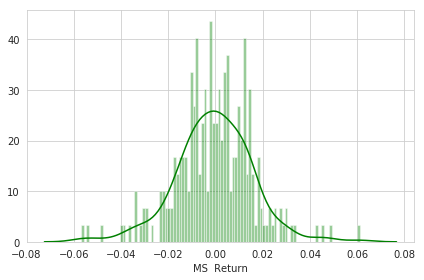

In [90]:
sns.set_style("whitegrid")
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS  Return'], bins=100, color='green')
plt.tight_layout()

In [81]:
#returns.ix['2015-01-01':'2015-12-31']['MS  Return'].head()

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



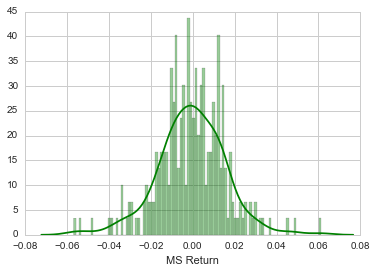

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/home/hackerman/anaconda2/envs/py36-test/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


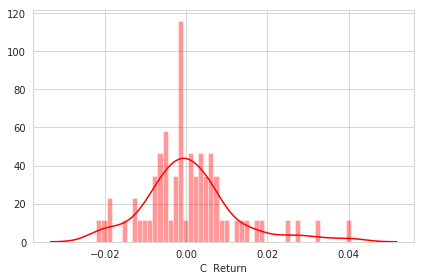

In [93]:
# using the 2013 data
sns.set_style("whitegrid")
sns.distplot(returns.ix['2013-09-24':'2013-12-31']['C  Return'], bins=50, color='red')
plt.tight_layout()

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



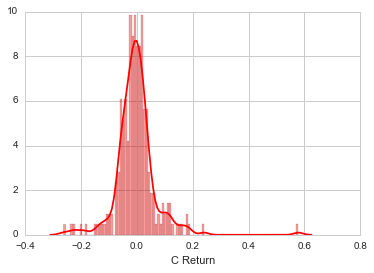

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [100]:
bank_stocks.head()

Bank Ticker     BAC                                              C            \
Stock Info      open     high      low    close     volume     open     high   
date                                                                           
2013-09-23   13.4241  13.4381  13.2177  13.2646  127074957  47.8652  48.0761   
2013-09-24   13.3021  13.3678  13.1426  13.2177   96122141  47.3670  47.4149   
2013-09-25   13.2458  13.3584  13.1614  13.2646   86491478  46.9933  47.4724   
2013-09-26   13.3115  13.3396  13.1145  13.2083   89211460  47.2137  47.4245   
2013-09-27   13.1239  13.1614  13.0207  13.0395   78954848  46.7250  47.1466   

Bank Ticker                                ...         MS                     \
Stock Info       low    close    volume    ...        open     high      low   
date                                       ...                                 
2013-09-23   47.2329  47.5012  34561992    ...     25.6581  25.7040  24.9612   
2013-09-24   46.8879  46.9166  26371407    ...     24.9794  25.4656  24.8512   
2013-09-25   46.6387  47.2041  26930854    ...     25.0529  25.1538  24.6311   
2013-09-26   46.4758  46.8879  23337352    ...     25.0070  25.2913  24.7778   
2013-09-27   46.6579  46.8496  20243114    ...     24.6678  24.8878  24.4843   

Bank Ticker                        WFC                                        
Stock Info     close    volume     open     high      low    close    volume  
date                                                                          
2013-09-23   24.9612  23544535  36.8224  36.9092  36.5099  36.7269  16474582  
2013-09-24   25.0070  17116348  36.5186  36.7182  36.1974  36.2234  22122725  
2013-09-25   24.9612  16376615  36.3102  36.4231  35.8415  36.2929  19187145  
2013-09-26   24.8970  12894727  36.3884  36.6314  35.9456  36.1193  20494186  
2013-09-27   24.8328  12111939  36.0845  36.2581  36.0325  36.1019  20017656  

[5 rows x 30 columns]

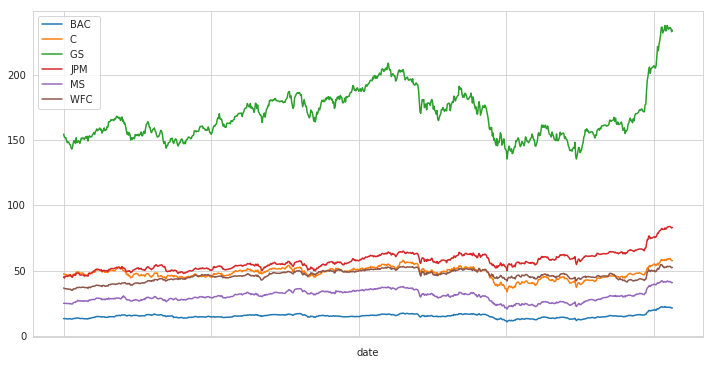

In [98]:
# using pandas line plot
for tick in tickers:
    bank_stocks[tick]['close'].plot(figsize=(12,6), label=tick)
plt.legend()

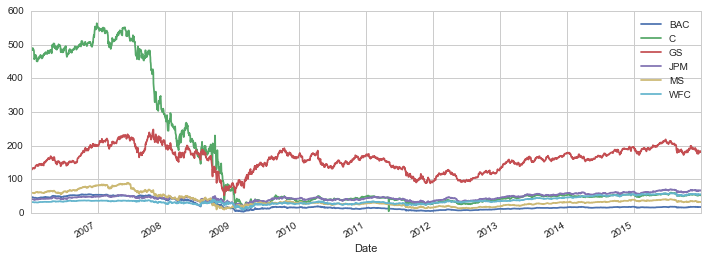

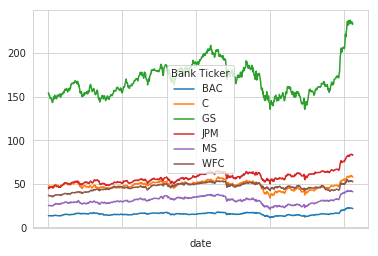

In [101]:
# using pandas xs
bank_stocks.xs(key='close', axis=1, level='Stock Info').plot()

# missing here the line of code that moves the legend to the outer plot

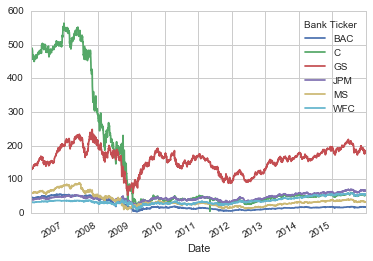

In [25]:
# Using live plots with plotly (just have to add iplot)
bank_stocks.xs(key='close', axis=1, level='Stock Info').iplot() #this one sets legend and dates by itself!

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [110]:
BAC['close'].head() #they are separate dataframes!

date
2013-09-23    13.2646
2013-09-24    13.2177
2013-09-25    13.2646
2013-09-26    13.2083
2013-09-27    13.0395
Name: close, dtype: float64

/home/hackerman/anaconda2/envs/py36-test/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

/home/hackerman/anaconda2/envs/py36-test/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



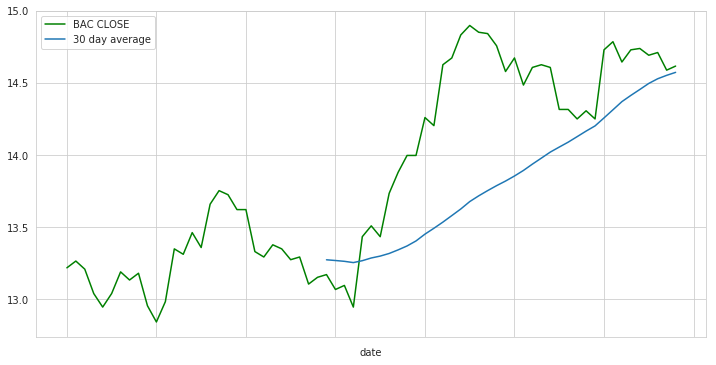

In [120]:
# two plots: rolling average and BAC close price
#bank_stocks[bank_stocks['BAC '].xs(key='close', axis=1, level='Stock Info').iplot()
#bank_stocks['BAC ']['close'].plot(figsize=(12,6), label='BACK CLOSE', color='green')

plt.figure(figsize=(12,6))
BAC['close'].ix['2013-09-24':'2013-12-31'].plot(figsize=(12,6), color='green', label='BAC CLOSE')
BAC['close'].ix['2013-09-24':'2013-12-31'].rolling(window=30).mean().plot(label='30 day average') #syntax for moving average
plt.legend()

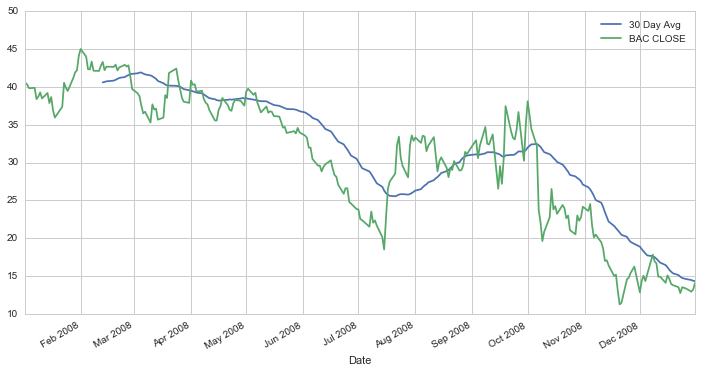

** Create a heatmap of the correlation between the stocks Close Price.**

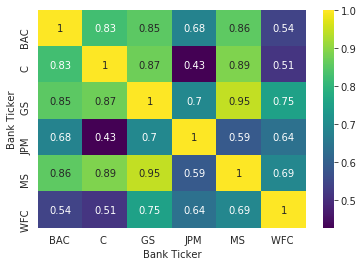

In [123]:
# create first appropriate matrix
sns.heatmap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(), annot=True, cmap='viridis')

** Optional: Use seaborn's clustermap to cluster the correlations together:**

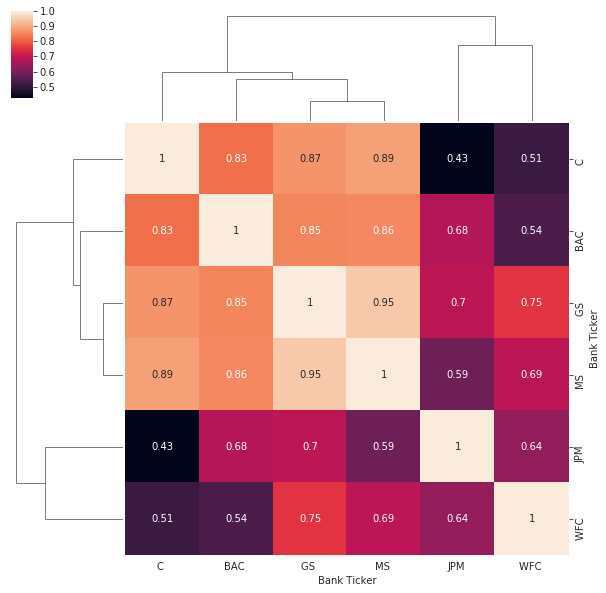

In [124]:
sns.clustermap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(), annot=True)

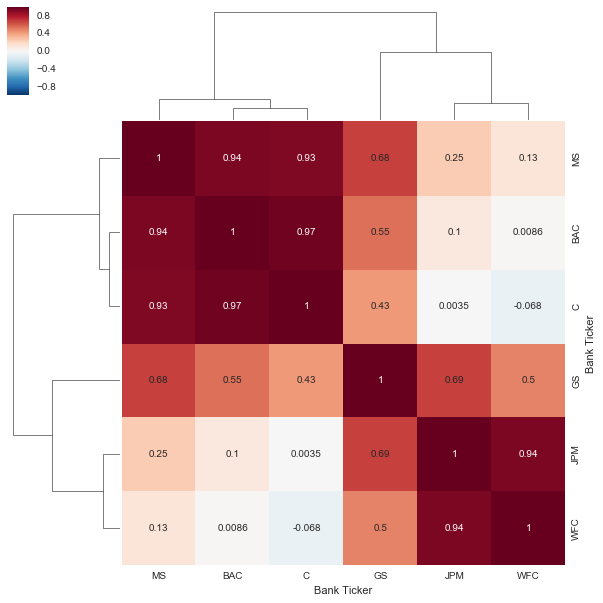

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [19]:
BAC.head()

open     high      low    close     volume
date                                                     
2013-09-23  13.4241  13.4381  13.2177  13.2646  127074957
2013-09-24  13.3021  13.3678  13.1426  13.2177   96122141
2013-09-25  13.2458  13.3584  13.1614  13.2646   86491478
2013-09-26  13.3115  13.3396  13.1145  13.2083   89211460
2013-09-27  13.1239  13.1614  13.0207  13.0395   78954848

In [27]:
BAC[['open','high','low','close']].ix['2015-01-01':'2016-01-01'].iplot(kind='candle')
#BAC[['Open', 'High', 'Low', 'Close']].ix['2015-01-01':'2016-01-01'].iplot(kind='candle')

/home/hackerman/anaconda2/envs/py36-test/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [28]:
MS['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma', title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [30]:
BAC['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll', title='Bollinger Band Plot')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.